# 회귀 + 결정트리 +랜덤 포레스트

In [102]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy.stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.font_manager as fm
from statsmodels.stats.stattools import omni_normtest
from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

import graphviz
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor as GBR

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz


In [103]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [104]:
print(plt.rcParams['font.family'])

['NanumGothic']


In [105]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/부품수리시간.csv", engine='python',encoding='cp949')
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [106]:
df_raw.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [107]:
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           8.92e-13
Time:                        10:07:28   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


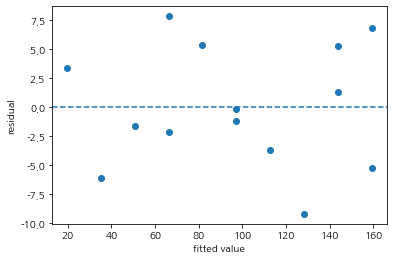

In [108]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0,linestyle="--")

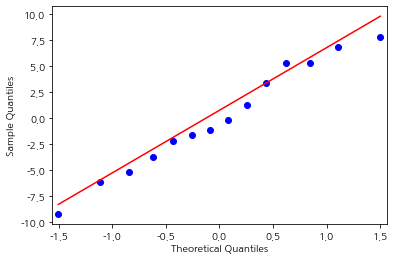

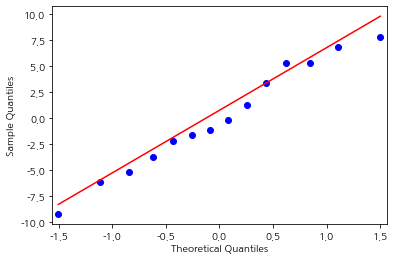

In [109]:
qqplot(reg_result.resid,line="q")

In [110]:
omni_normtest(reg_result.resid,axis=0)


/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

In [111]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


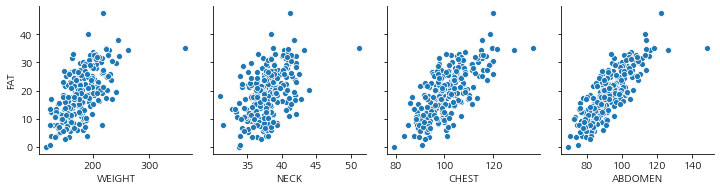

In [112]:
sns.pairplot(df_raw, y_vars = "FAT", x_vars=["WEIGHT", "NECK", 'CHEST', "ABDOMEN"])

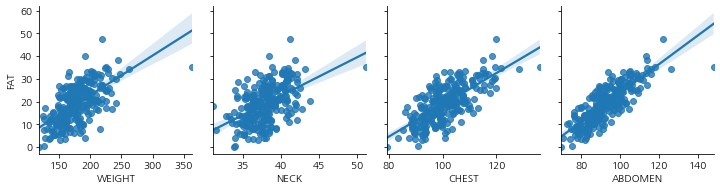

In [113]:
sns.pairplot(df_raw, y_vars="FAT", x_vars = ["WEIGHT", "NECK", 'CHEST', "ABDOMEN"],kind = 'reg')

In [114]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [115]:
#sns.pairplot(df_raw)

In [116]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [117]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + \
                        ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_raw)


reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           7.72e-64
Time:                        10:07:34   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [118]:
df_raw_x = df_raw.drop(["FAT"],axis = 1)
df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [119]:
df_raw_x = df_raw.drop(["FAT","WEIGHT"],axis = 1)
df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


In [120]:
df_raw_y = df_raw["FAT"]
model = LinearRegression()


rfe = RFE(estimator = model, n_features_to_select= 5).fit(df_raw_x,df_raw_y)



selected_cols = df_raw_x.columns[rfe.support_]

removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))


Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [121]:
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        10:07:36   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

<AxesSubplot:>

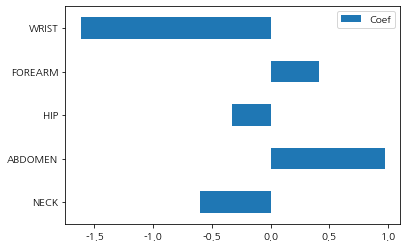

In [122]:
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, \
                          index = selected_cols)

df_reg_coef.plot.barh(y="Coef",legend = True)

In [123]:
scaler = StandardScaler()
cols = df_raw_x.columns
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled["FAT"] = df_raw["FAT"]
reg_model_scaled = smf.ols(formula="FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST",data=df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        10:07:37   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

<AxesSubplot:>

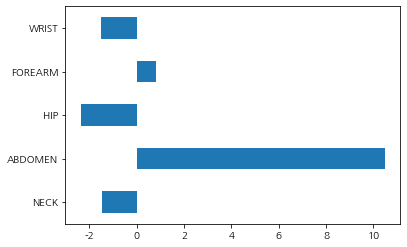

In [124]:

df_reg_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y="Coef", legend = False)

# 의사결정나무

In [125]:
import os
os.environ["PATH"]+= os.pathsep +"/home/piai/anaconda3/lib/python3.8/site-packages/graphviz/"


In [126]:
os.environ["PATH"]

'/home/piai/anaconda3/bin:/home/piai/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/home/piai/anaconda3/lib/python3.8/site-packages/graphviz/:/home/piai/anaconda3/lib/python3.8/site-packages/graphviz/:/home/piai/anaconda3/lib/python3.8/site-packages/graphviz/'

In [127]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [128]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)


In [129]:
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (176, 13)
train data Y size: (176,)
test data X size: (76, 13)
test data Y size: (76,)


In [130]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

DecisionTreeRegressor(random_state=1234)

In [131]:

print("Score on traing set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on traing set:1.000
Score on test set:0.345


In [132]:
train_score = []; test_score=[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,
                                min_samples_leaf=v_min_samples_leaf)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

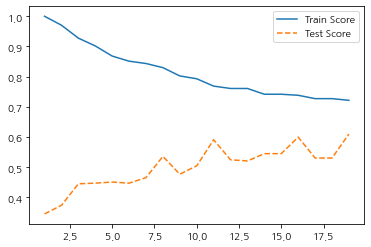

In [133]:

df_score_leaf.round(3)

plt.plot(para_leaf,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf,test_score,linestyle ='--', label = "Test Score")
plt.legend()

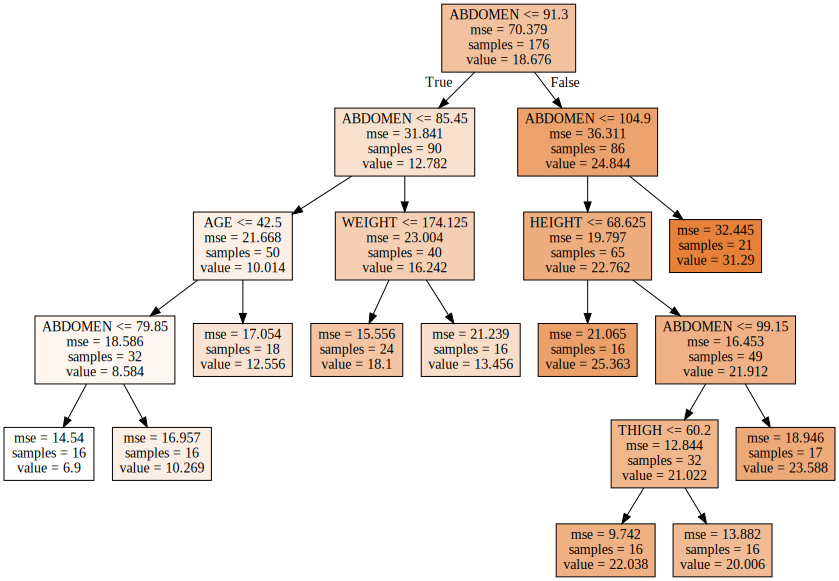

In [134]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

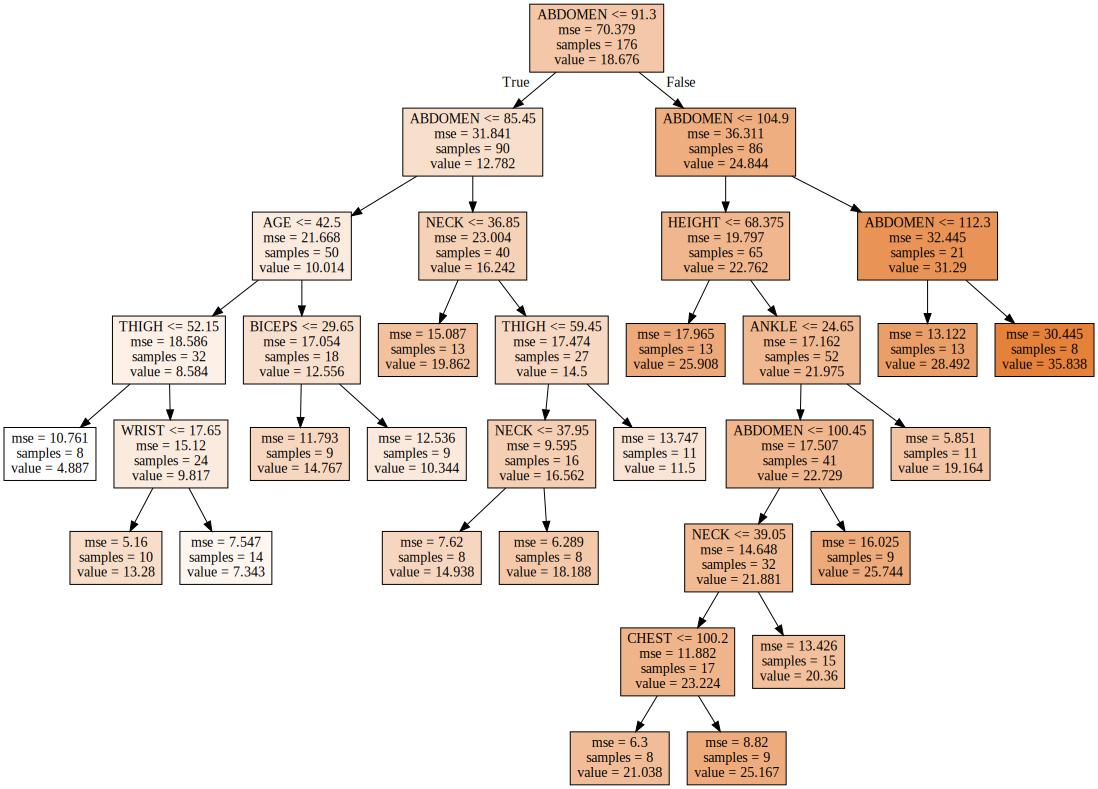

In [135]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [136]:
train_score = []; test_score=[]
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(min_samples_leaf=8
                                 ,random_state=1234,
                                min_samples_split=v_min_samples_split)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

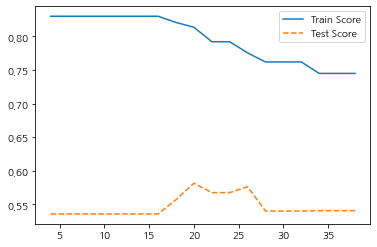

In [137]:

df_score_leaf.round(3)

plt.plot(para_split,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_split,test_score,linestyle ='--', label = "Test Score")
plt.legend()

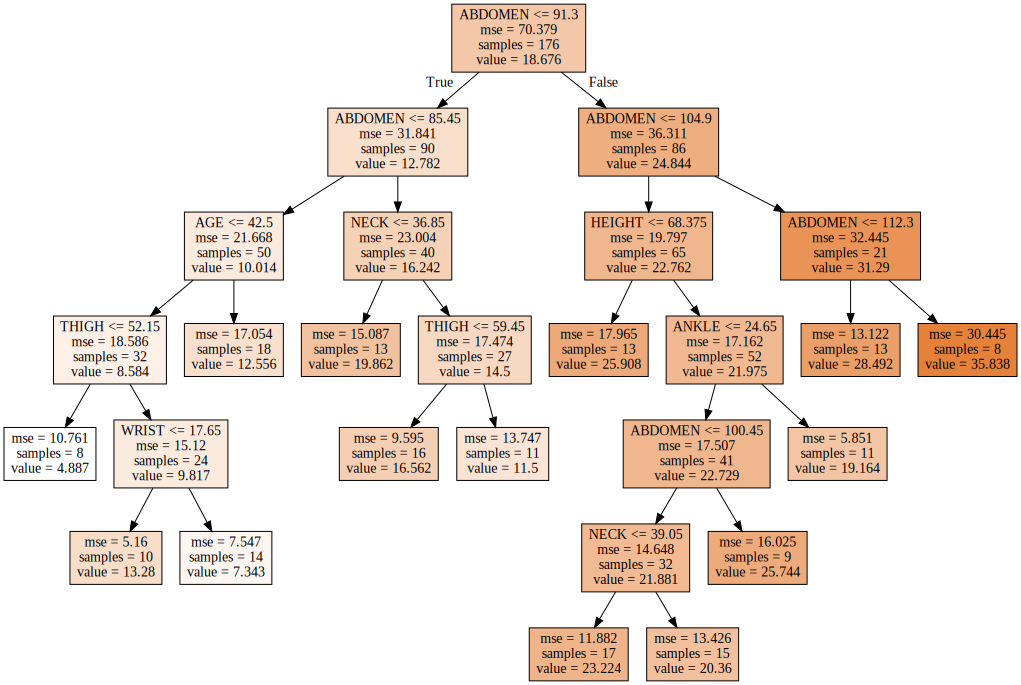

In [138]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 8,min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

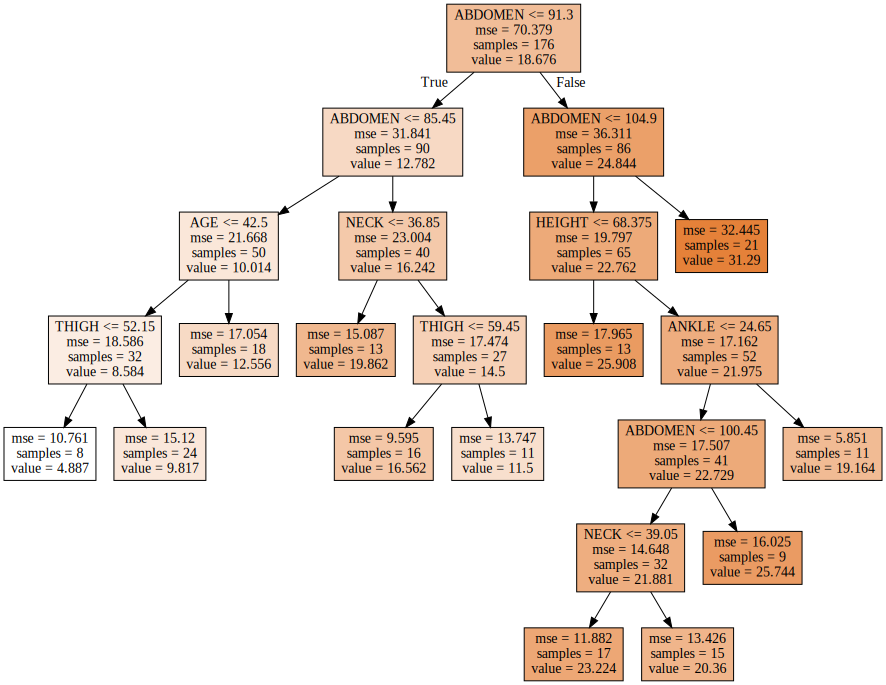

In [139]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 8,min_samples_split=26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [140]:
train_score = []; test_score=[]
para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(min_samples_leaf=8
                                 ,random_state=1234,
                                min_samples_split=20,
                                max_depth=v_max_depth)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

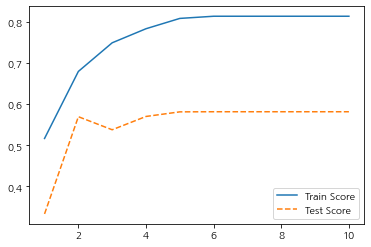

In [141]:

df_score_leaf.round(3)

plt.plot(para_depth,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_depth,test_score,linestyle ='--', label = "Test Score")
plt.legend()

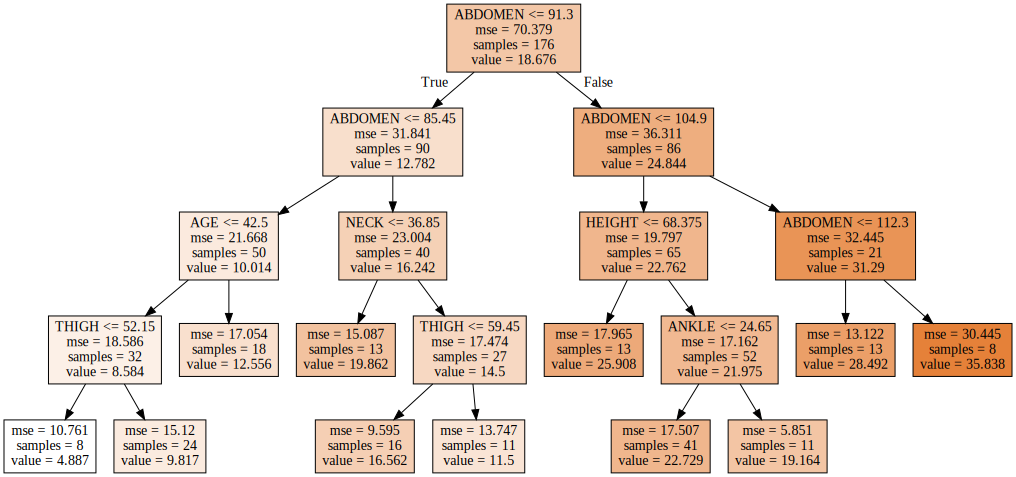

In [142]:
v_feature_name = df_test_x.columns

tree_graph = DecisionTreeRegressor(random_state = 1234 , min_samples_leaf = 8,
                                   min_samples_split=20,
                                   max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [143]:
tree_final = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_depth=4, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

In [144]:
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

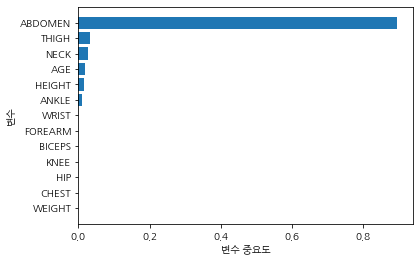

In [145]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 앙상블

In [146]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [147]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [148]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

In [149]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)


In [150]:
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (176, 13)
train data Y size: (176,)
test data X size: (76, 13)
test data Y size: (76,)


In [151]:
rf_uncustomized = RFR(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

RandomForestRegressor(random_state=1234)

In [152]:

print("Score on traing set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on traing set:0.956
Score on test set:0.612


In [153]:
train_score = []; test_score=[]


para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RFR(random_state=1234,n_estimators = v_n_estimators)
    
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    

    
df_score_n = pd.DataFrame()
df_score_n["n_estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

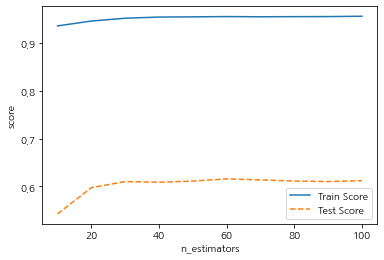

In [154]:

df_score_n.round(3)

plt.plot(para_n_tree,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_n_tree,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [155]:
train_score = []; test_score=[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RFR(random_state=1234,n_estimators = 100,
                                min_samples_leaf=v_min_samples_leaf)
    
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    

    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

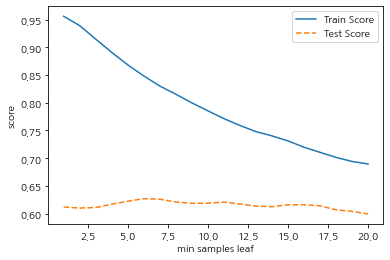

In [156]:
df_score_leaf.round(3)

plt.plot(para_leaf,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [157]:
train_score = []; test_score=[]
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RFR(random_state=1234,n_estimators = 100,
                                min_samples_leaf=6,
            min_samples_split=v_min_samples_split)
    
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    

    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

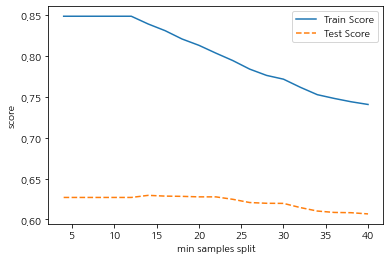

In [158]:
df_score_split.round(3)

plt.plot(para_split,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_split,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [159]:
train_score = []; test_score=[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RFR(random_state=1234,n_estimators = 100,
                                min_samples_leaf=6,
            min_samples_split=14,
            max_depth=v_max_depth)
    
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    

    
df_score_depth = pd.DataFrame()
df_score_depth["MinSamplesSplit"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

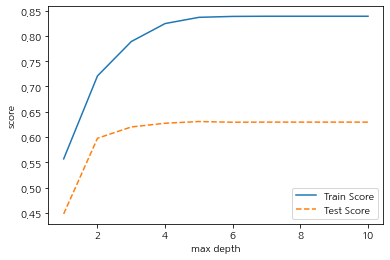

In [160]:
df_score_depth.round(3)

plt.plot(para_depth,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_depth,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [161]:
rf_final = RFR(n_estimators = 100, min_samples_leaf=6, min_samples_split=14, max_depth=4, random_state=1234)
rf_final.fit(df_train_x,df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [162]:
rf_final.fit(df_train_x,df_train_y)

print("Score on Training set:{:.3}".format(rf_final.score(df_train_x,df_train_y)))

print("Score on Test set:{:.3}".format(rf_final.score(df_test_x,df_test_y)))

Score on Training set:0.825
Score on Test set:0.627


In [163]:
v_feature_name = df_train_x.columns

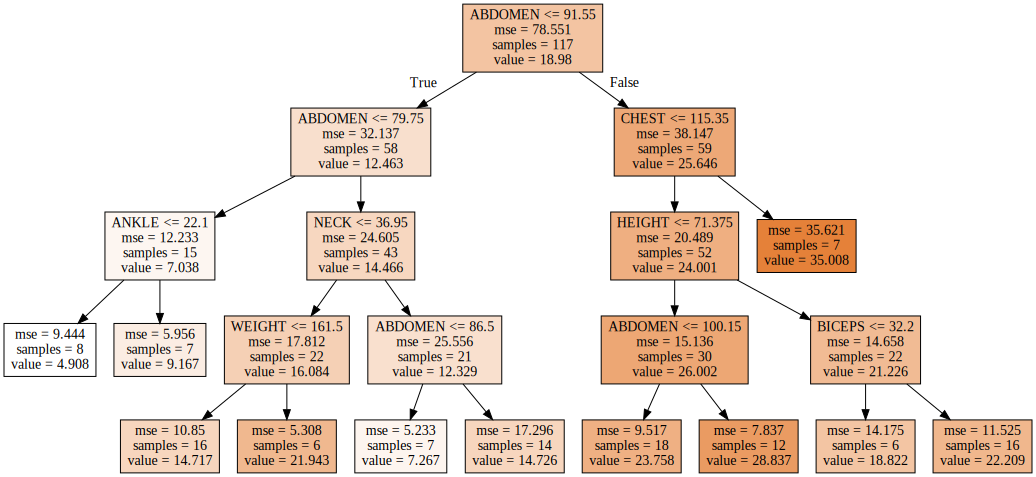

In [164]:

export_graphviz(rf_final.estimators_[0], out_file = "rf_final_0.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rf_final_0.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

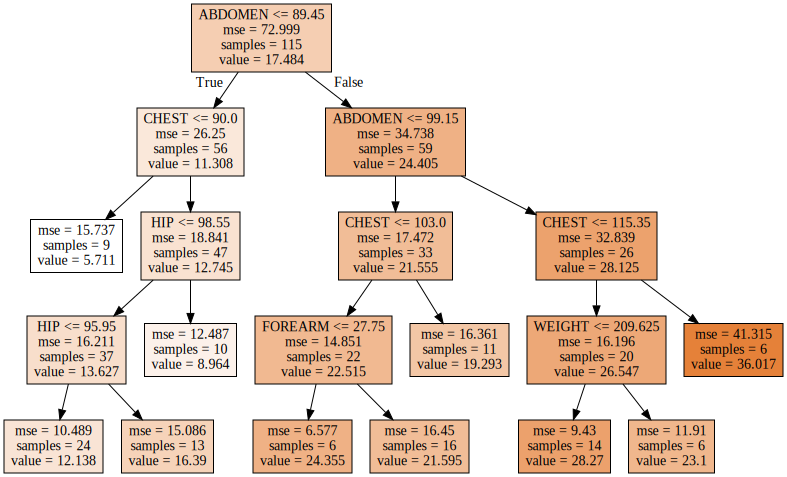

In [165]:

export_graphviz(rf_final.estimators_[1], out_file = "rf_final_1.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rf_final_1.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

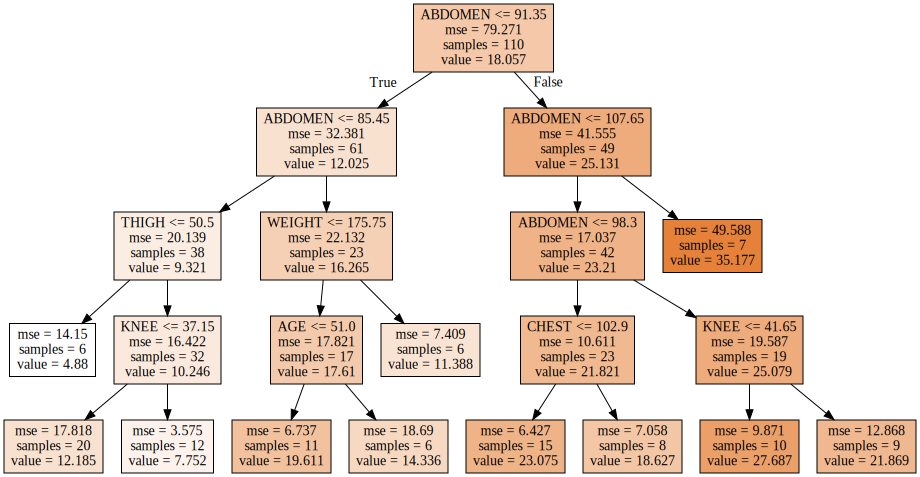

In [166]:

export_graphviz(rf_final.estimators_[10], out_file = "rf_final_10.dot",
               feature_names = v_feature_name, impurity = True, filled = True)

with open("rf_final_10.dot") as f:
    dot_graph =f.read()

display(graphviz.Source(dot_graph))

In [167]:
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=rf_final.feature_importances_


df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
12,WRIST,0.010
3,NECK,0.010
8,KNEE,0.009
1,WEIGHT,0.008


Text(0, 0.5, '변수')

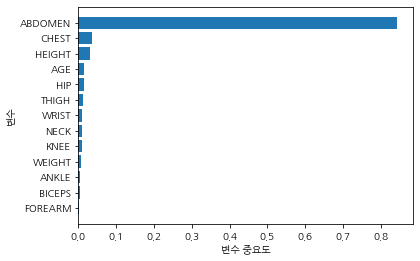

In [168]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [169]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [170]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

In [171]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)


In [172]:
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (176, 13)
train data Y size: (176,)
test data X size: (76, 13)
test data Y size: (76,)


In [173]:
gb_uncustomized = GBR(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

GradientBoostingRegressor(random_state=1234)

In [174]:

print("Score on traing set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))

print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on traing set:0.981
Score on test set:0.581


In [175]:
train_score = []; test_score=[]


para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GBR(random_state=1234,n_estimators = v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    

    
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

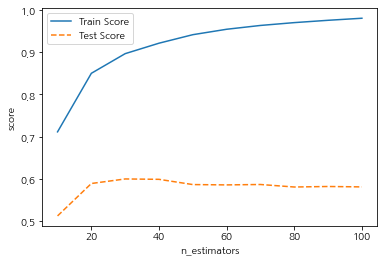

In [176]:
df_score_n.round(3)

plt.plot(para_n_tree,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_n_tree,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [177]:
train_score = []; test_score=[]


para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GBR(random_state=1234,n_estimators = 30,
            min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    

    
df_score_n = pd.DataFrame()
df_score_n["MinSampleLeaf"] = para_leaf
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

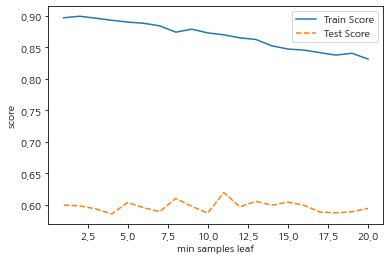

In [178]:
df_score_n.round(3)

plt.plot(para_leaf,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_leaf,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [179]:
train_score = []; test_score=[]


para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb = GBR(random_state=1234,n_estimators = 30,
            min_samples_leaf=11,
            min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    

    
df_score_n = pd.DataFrame()
df_score_n["MinSampleSplit"] = para_split
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

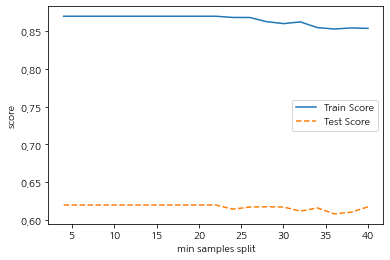

In [180]:
df_score_n.round(3)

plt.plot(para_split,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_split,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [181]:
train_score = []; test_score=[]


para_depth = [depth  for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GBR(random_state=1234,n_estimators = 30,
            min_samples_leaf=11,
            min_samples_split=22,
            max_depth=v_max_depth
            )
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    

    
df_score_n = pd.DataFrame()
df_score_n["MaxDepth"] = para_depth
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

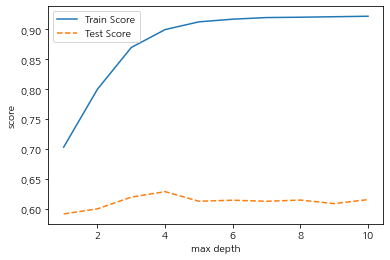

In [182]:
df_score_n.round(3)

plt.plot(para_depth,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_depth,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [183]:
train_score = []; test_score=[]
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GBR(random_state=1234,n_estimators = 30,
                                min_samples_leaf=11,
            min_samples_split=22,
            max_depth=4,
            learning_rate=v_learning_rate)
    
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    

    
df_score_depth = pd.DataFrame()
df_score_depth["LearningRate"] = para_lr
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

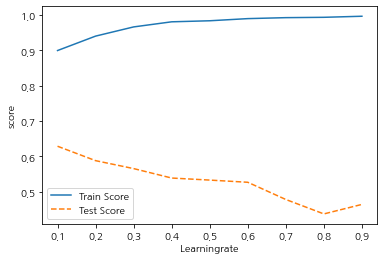

In [184]:
df_score_n.round(3)

plt.plot(para_lr,train_score, linestyle = '-', label = "Train Score")
plt.plot(para_lr,test_score, linestyle ='--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("Learningrate")
plt.legend()

In [185]:
gb_final = GBR(n_estimators = 30, min_samples_leaf=11, min_samples_split=22, max_depth=4,learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x,df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [186]:
gb_final.fit(df_train_x,df_train_y)

print("Score on Training set:{:.3}".format(gb_final.score(df_train_x,df_train_y)))

print("Score on Test set:{:.3}".format(gb_final.score(df_test_x,df_test_y)))

Score on Training set:0.9
Score on Test set:0.629


In [187]:
v_feature_name = df_train_x.columns

In [188]:
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"]=gb_final.feature_importances_


df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, '변수')

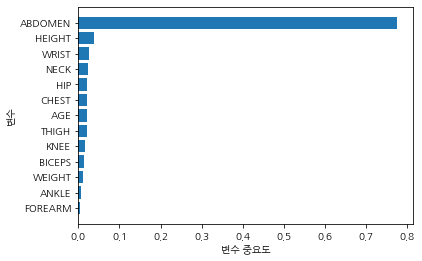

In [189]:
df_importance.sort_values("Importance", ascending =True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [190]:
# estimator = GBR(random_state=1234)
# param_grid = {"criterion":["mse", "friedman_mse",'mae'], 'max_features':["auto",'sqrt','log2'],'learning_rate':para_lr,
#              "max_depth":para_depth,"min_samples_leaf":para_leaf}

# grid_gb= GridSearchCV(estimator, param_grid, scoring='r2',n_jobs=-1)
# grid_gb.fit(df_train_x,df_train_y)

# print("Best estimator model:\n{}".format(grid_gb.best_estimator_))
# print("\n best parameter:\n{}".format(grid_gb.best_params_))
# print("Best score:\n{}".format(grid_gb.best_score_.round(3)))